## Quantum State Classifier

In [41]:
import qutip
import numpy as np
np.random.seed(42)
from qutip import *

In [56]:



features_list = []
labels = []
for _ in range(10000):
    state = rand_dm(4)
    state.dims = [[2,2], [2,2]]
    matrix_features = np.concatenate([state.full().real.flatten(), state.full().imag.flatten()])
    purity = state.purity()
    entropy = entropy_vn(state)
    pauli_expect = [expect(op, state) for op in pauli_ops]
    rho_A = ptrace(state, 0)
    entropy_A = entropy_vn(rho_A)
    rho_B = ptrace(state, 1)
    entropy_B = entropy_vn(rho_B)
    eigenvalues = np.linalg.eigvals(state.full()).real
    features = np.concatenate([matrix_features, [purity, entropy, entropy_A, entropy_B], pauli_expect, eigenvalues])
    features_list.append(features)
    labels.append(1 if concurrence(state) > 0 else 0)
features = np.array(features_list)
labels = np.array(labels)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
model = LogisticRegression().fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(accuracy)

0.843


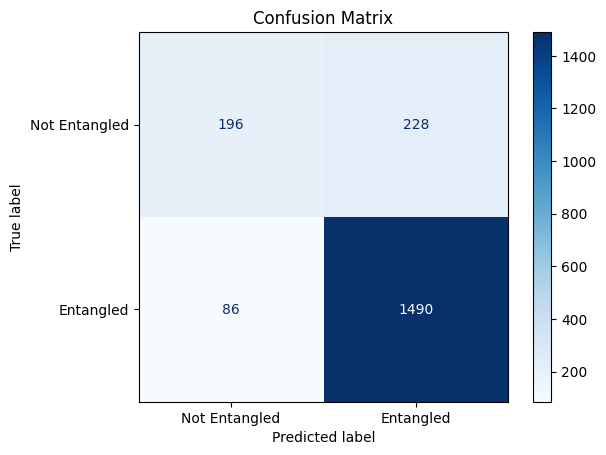

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Entangled', 'Entangled'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [60]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(LogisticRegression(), features, labels, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Cross-Validation Accuracy: 0.8388 ± 0.0024
